# Predicting Admission Chances - Regression Case Study

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data from admissions.csv 

In [2]:
!!cd

['D:\\classroom\\jul18d\\admission']

In [11]:
df = pd.read_csv("admission.csv")

### Understand data 

In [12]:
df.sample(5)

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
350,351,318,107,3,3.0,3.5,8.27,1,0.74
37,38,300,105,1,1.0,2.0,7.80,0,0.58
429,430,340,115,5,5.0,4.5,9.06,1,0.95
225,226,296,99,2,2.5,2.5,8.03,0,0.61
276,277,329,113,5,5.0,4.5,9.45,1,0.89


In [5]:
df.shape

(500, 9)

In [13]:
## drop column Sno as it is not imp.
df.drop(columns=['Sno'], inplace=True) 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gre       500 non-null    int64  
 1   Toefl     500 non-null    int64  
 2   Rating    500 non-null    int64  
 3   Sop       500 non-null    float64
 4   Lor       500 non-null    float64
 5   Cgpa      500 non-null    float64
 6   Research  500 non-null    int64  
 7   Chance    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [15]:
df.describe()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Data Visualization 

### Univariate Analysis

In [16]:
df['Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

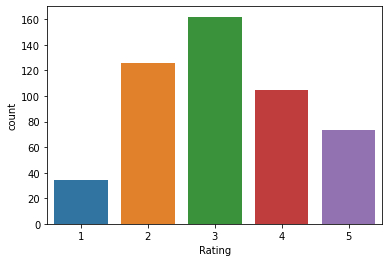

In [10]:
sns.countplot(x="Rating", data = df)

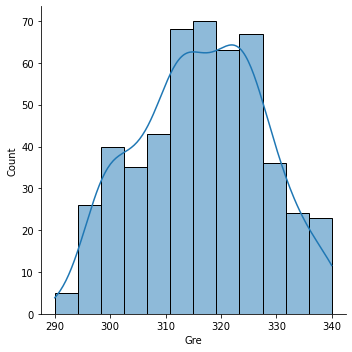

In [11]:
sns.displot(df.Gre, kde=True)

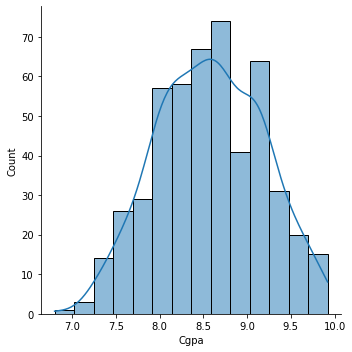

In [17]:
sns.displot(df.Cgpa, kde=True)

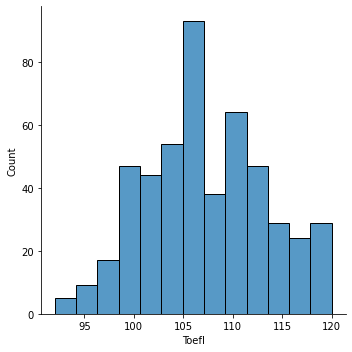

In [13]:
sns.displot(df.Toefl)

<AxesSubplot:>

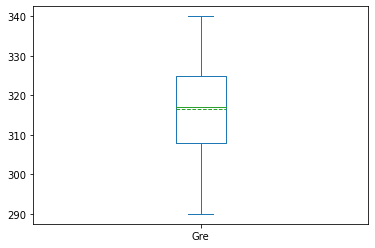

In [18]:
df.Gre.plot.box(showmeans=True, meanline=True)

<AxesSubplot:>

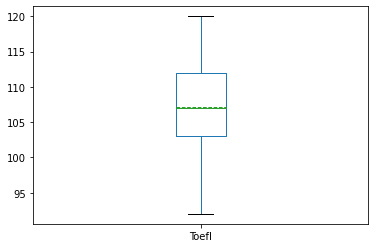

In [15]:
df.Toefl.plot.box(showmeans=True, meanline=True)

<AxesSubplot:>

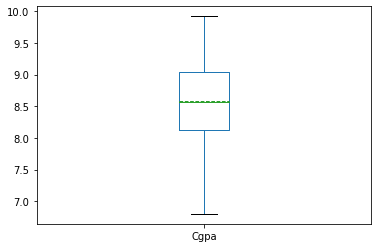

In [16]:
df.Cgpa.plot.box(showmeans=True, meanline=True)

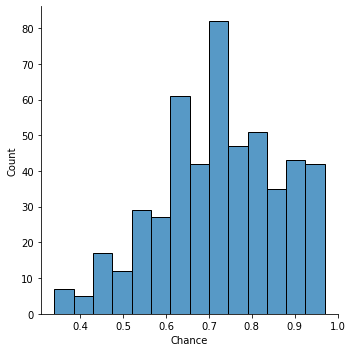

In [17]:
sns.displot(df.Chance)

<AxesSubplot:>

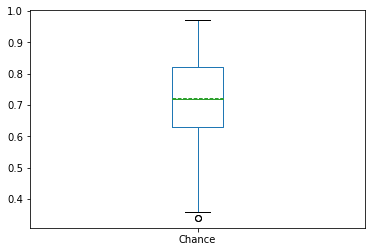

In [18]:
df.Chance.plot.box(showmeans=True, meanline=True)

<AxesSubplot:>

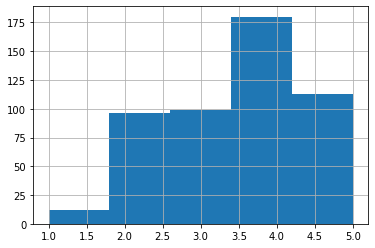

In [19]:
df.Lor.hist(bins=5)

<AxesSubplot:>

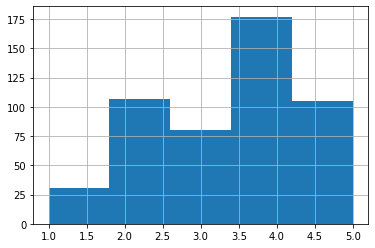

In [20]:
df.Sop.hist(bins=5)

In [21]:
df.Sop.value_counts().sort_index()

1.0     6
1.5    25
2.0    43
2.5    64
3.0    80
3.5    88
4.0    89
4.5    63
5.0    42
Name: Sop, dtype: int64

<AxesSubplot:xlabel='Research', ylabel='count'>

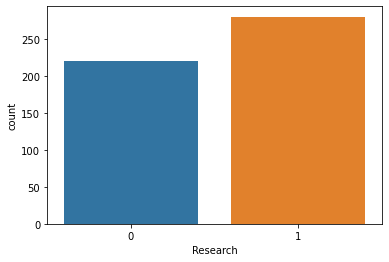

In [22]:
sns.countplot(x="Research", data =df)

In [23]:
df.Research.value_counts()

1    280
0    220
Name: Research, dtype: int64

### Bi-variate Ananlysis

<AxesSubplot:xlabel='Rating', ylabel='Gre'>

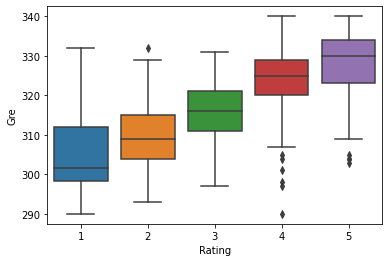

In [24]:
sns.boxplot(y="Gre", x="Rating", data=df)   # Compare categorical with continous variable 

<AxesSubplot:xlabel='Rating', ylabel='Cgpa'>

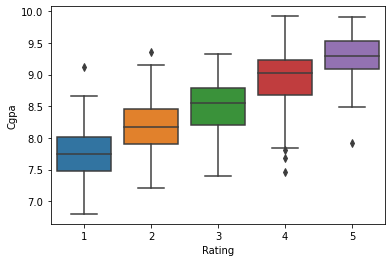

In [25]:
sns.boxplot(y="Cgpa", x ="Rating", data=df)

<AxesSubplot:xlabel='Rating', ylabel='Toefl'>

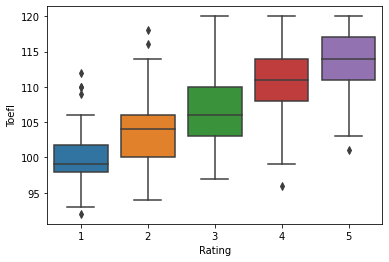

In [26]:
sns.boxplot(y="Toefl", x ="Rating", data=df)

<AxesSubplot:xlabel='Toefl', ylabel='Gre'>

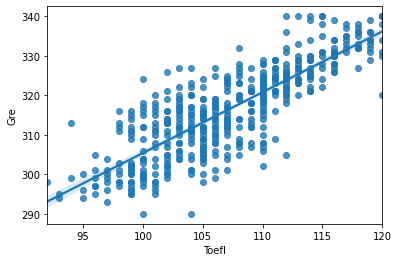

In [27]:
sns.regplot(x="Toefl", y="Gre", data = df)

In [28]:
df[['Gre','Toefl','Cgpa','Chance']].corr()

,Gre,Toefl,Cgpa,Chance
Gre,1.000000,0.827200,0.825878,0.810351
Toefl,0.827200,1.000000,0.810574,0.792228
Cgpa,0.825878,0.810574,1.000000,0.882413
Chance,0.810351,0.792228,0.882413,1.000000


<AxesSubplot:xlabel='Cgpa', ylabel='Gre'>

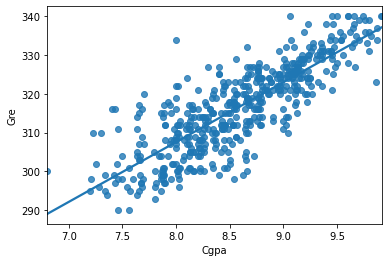

In [29]:
sns.regplot(x='Cgpa',y = 'Gre', data  = df, ci = False)

<AxesSubplot:xlabel='Cgpa', ylabel='Chance'>

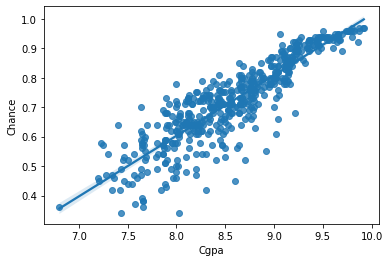

In [19]:
sns.regplot(data=df, x='Cgpa',y='Chance') 

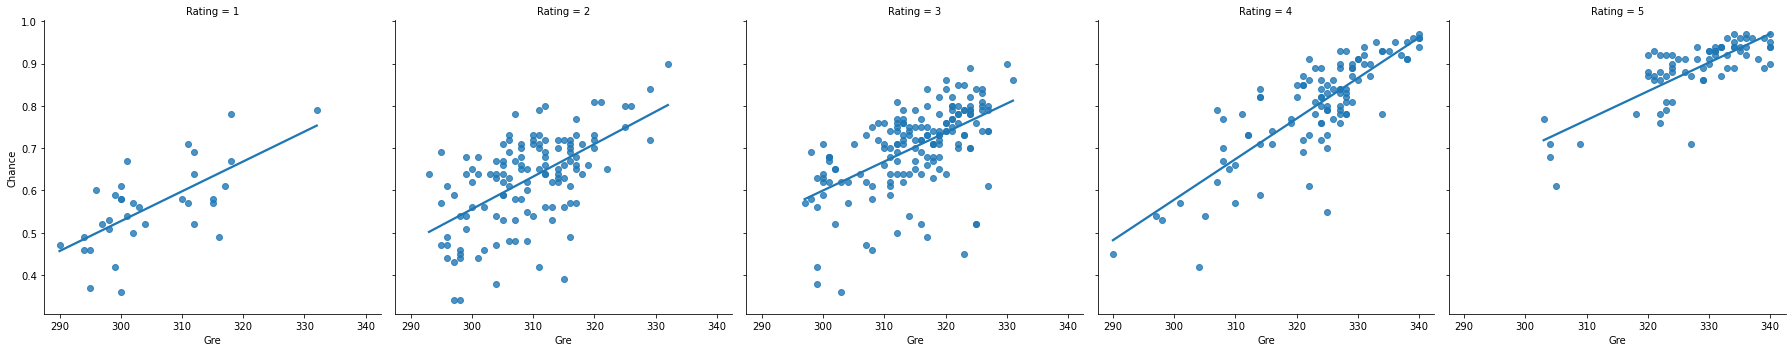

In [20]:
sns.lmplot(data=df, x='Gre',y='Chance',col="Rating", ci = False) 

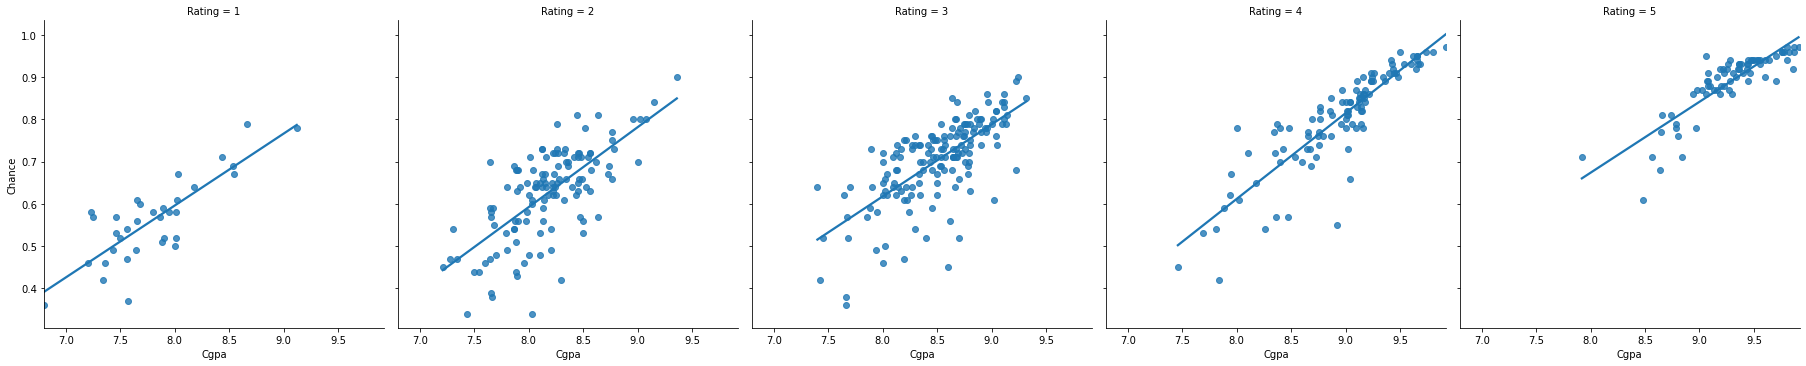

In [32]:
sns.lmplot(data=df, x='Cgpa',y='Chance',col="Rating", ci=False) 

<AxesSubplot:xlabel='Sop', ylabel='Gre'>

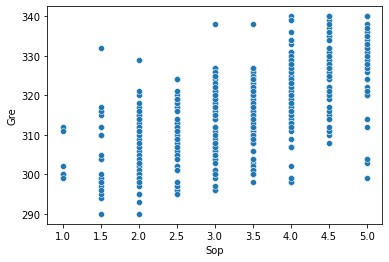

In [33]:
sns.scatterplot(data=df, x='Sop',y='Gre') 

In [21]:
corrmat = df.corr()

In [22]:
corrmat

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
Gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
Toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
Cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [23]:
corrmat['Chance'].sort_values(ascending=False)

Chance      1.000000
Cgpa        0.882413
Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Research    0.545871
Name: Chance, dtype: float64

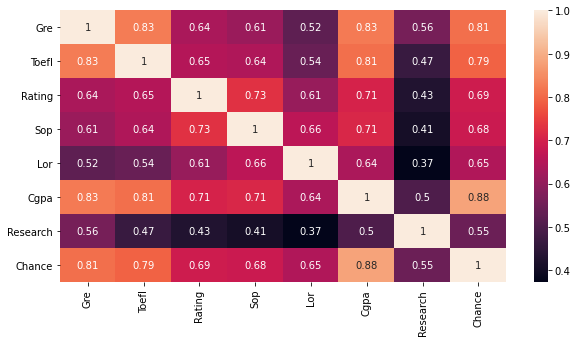

In [37]:
sns.heatmap(corrmat,annot=True)
plt.gcf().set_size_inches(10,5)

### Build Machine Learning Model 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [39]:
X = df[['Gre','Toefl','Cgpa']]
y = df['Chance'] * 100          # Convert fraction to percentage 

In [40]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 3), (100, 3), (400,), (100,))

In [42]:
## Fit model or Train Model or Build model 
lr_model = LinearRegression()
lr_model.fit(X_train,y_train) 

LinearRegression()

In [43]:
lr_model.coef_  # Slopes

array([ 0.2530053 ,  0.31789215, 14.25427517])

In [44]:
lr_model.intercept_

-164.24396080709775

In [45]:
gre = 320
tof= 110
cgpa = 9.2
chance = lr_model.intercept_ + gre * lr_model.coef_[0] + tof * lr_model.coef_[1] + cgpa * lr_model.coef_[2] 
print(chance)

82.82520356004491


### Evaluate Model with Train data

In [46]:
lr_model.score(X_train,y_train)   # R2 Score

0.8122343451664386

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
y_pred = lr_model.predict(X_train)
print(type(y_pred))

<class 'numpy.ndarray'>


In [50]:
np.floor(y_pred[:10])  # Predicted value 

array([93., 76., 95., 60., 68., 59., 73., 84., 71., 73.])

In [51]:
y_train[:10].values  # Actual value

array([91., 72., 96., 67., 75., 59., 72., 85., 71., 77.])

In [52]:
mse = mean_squared_error(y_train,y_pred)  # Actual and predicted 
print("MSE   :" ,mse )
print("RMSE  :" ,np.sqrt(mse))

MSE   : 38.24616930456159
RMSE  : 6.184348737301414


In [53]:
result = pd.DataFrame( {"Actual" : y_train, "Predicted" : y_pred})
result.head()

,Actual,Predicted
107,91.0,93.310656
336,72.0,76.727945
71,96.0,95.491467
474,67.0,60.381835
6,75.0,68.506042


In [ ]:
## Draw scatter plot with blue and red dots for actual and predicted 

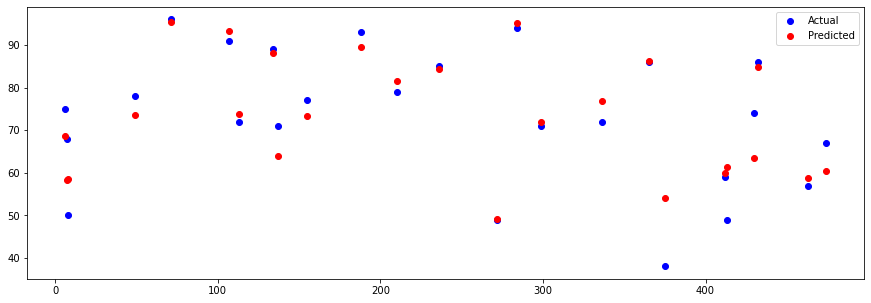

In [54]:
size = 25
plt.scatter(result.index[:size], result['Actual'].head(size), color='blue',label="Actual")
plt.scatter(result.index[:size], result['Predicted'].head(size), color='red', label = "Predicted")
plt.legend()
plt.gcf().set_size_inches(15,5)

### Evaluate with Test data

In [55]:
## Evaluate Model using test data 
y_pred = lr_model.predict(X_test)

In [56]:
lr_model.score(X_test,y_test)

0.7632878240069337

In [58]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.7632878240069337


In [59]:
res = pd.DataFrame({'Actual' : y_test[:25], 'Pred' : y_pred [:25]})

In [60]:
res.head(10)

,Actual,Pred
90,64.0,62.802152
254,85.0,83.209435
283,80.0,79.119818
445,91.0,85.046086
461,68.0,60.222891
15,54.0,66.888863
316,54.0,55.297329
489,65.0,68.293116
159,52.0,55.296602
153,79.0,75.833340


In [61]:
mse = mean_squared_error(y_test,y_pred)
print("MSE   :" ,mse )
print("RMSE  :" ,np.sqrt(mse))

MSE   : 41.341189756749046
RMSE  : 6.429711483165403


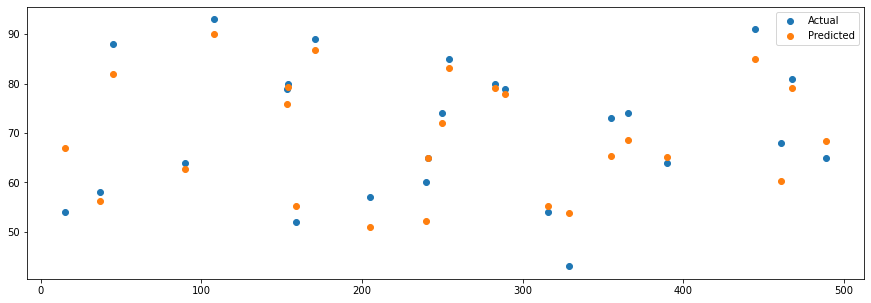

In [62]:
plt.scatter(res.index, res['Actual'], label="Actual")
plt.scatter(res.index, res['Pred'], label="Predicted")
plt.legend()
plt.gcf().set_size_inches(15,5)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Actual'>

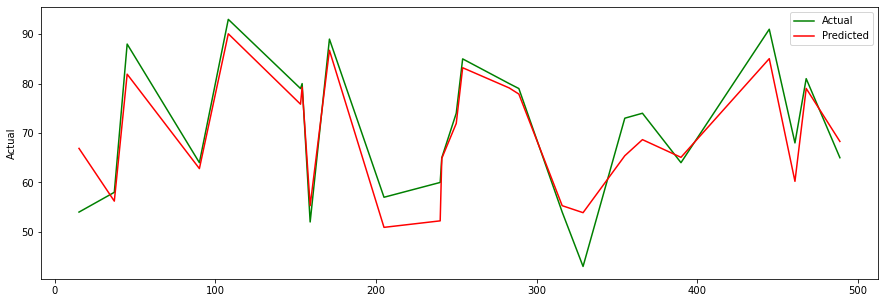

In [64]:
plt.gcf().set_size_inches(15,5)
sns.lineplot(res.index, res['Actual'], color='green', label="Actual")
sns.lineplot(res.index, res['Pred'], color='red', label='Predicted')

## pickle model

In [65]:
pd.to_pickle(lr_model,'lr_model.pickle')